In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

In [96]:
df_weather = pd.read_csv("../data/csv/weather_data.csv",index_col="datetime",parse_dates=True)

In [104]:
df_weather.loc["2022"]

,temperature,precipitation,sunshine,wind_speed,wind_direction,pressure,humidity,weather,cloud
datetime,,,,,,,,,
2022-01-01 00:00:00,0.1,0.0,0.0,2.7,北西,1012.3,44.0,NaN,NaN
2022-01-01 01:00:00,0.7,0.0,0.0,4.8,北西,1012.5,40.0,NaN,NaN
2022-01-01 02:00:00,0.5,0.0,0.0,3.7,北西,1012.7,41.0,NaN,NaN
2022-01-01 03:00:00,0.5,0.0,0.0,3.5,北西,1012.7,40.0,1.0,0
2022-01-01 04:00:00,0.3,0.0,0.0,3.2,北西,1013.0,41.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-11-28 20:00:00,13.2,0.0,0.0,1.4,西,1023.9,69.0,NaN,NaN
2022-11-28 21:00:00,13.2,0.0,0.0,1.9,北西,1023.4,71.0,4.0,10
2022-11-28 22:00:00,13.4,0.0,0.0,1.7,西北西,1023.4,70.0,NaN,NaN


In [121]:
# AorYが年、Qが四半期、SMが15日と月末、Mが月末、Wが週（日曜開始）、Bが平日、Dが毎日
# 接頭語Bを付けると平日のみ集計、接尾語Sを付けると表示が開始日になる
df_weather.resample(rule = "YS").mean()["temperature"]

datetime
2002-01-01     7.459418
2003-01-01    16.053322
2004-01-01    17.363160
2005-01-01    16.253881
2006-01-01    16.452683
2007-01-01    17.028459
2008-01-01    16.451480
2009-01-01    16.732705
2010-01-01    16.950285
2011-01-01    16.516689
2012-01-01    16.322735
2013-01-01    17.137911
2014-01-01    16.640342
2015-01-01    16.452032
2016-01-01    16.466587
2017-01-01    15.873116
2018-01-01    16.835776
2019-01-01    16.494975
2020-01-01    16.553683
2021-01-01    16.667100
2022-01-01    17.269218
Freq: AS-JAN, Name: temperature, dtype: float64

In [109]:
pd.DataFrame.resample?

# 移動平均とトレンド

In [9]:
element = "temperature"

In [122]:
# 計算方法
# centerを付けると結果が中央になる。つけないと後ろに寄る。
# min_periodsを付けると欠損があっても数が足りていれば対応してくれる
print("element:",element)
df_weather[element].rolling(24,min_periods=20,center=True).mean()

element: temperature


datetime
2002-11-29 01:00:00   NaN
2002-11-29 02:00:00   NaN
2002-11-29 03:00:00   NaN
2002-11-29 04:00:00   NaN
2002-11-29 05:00:00   NaN
                       ..
2022-11-28 20:00:00   NaN
2022-11-28 21:00:00   NaN
2022-11-28 22:00:00   NaN
2022-11-28 23:00:00   NaN
2022-11-29 00:00:00   NaN
Name: temperature, Length: 175320, dtype: float64

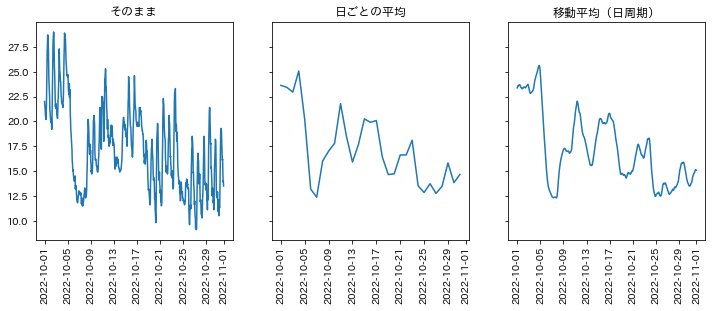

In [331]:
# 移動平均（日）
period = "2022-10"

fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(12,4),sharey=True)

# そのまま
axes[0].plot(df_weather.loc[period,element])
axes[0].set_title("そのまま")

# 日ごとの平均
mean_by_day = df_weather[element].resample(rule="D").mean().loc[period]
axes[1].plot(mean_by_day)
axes[1].set_title("日ごとの平均")

# 移動平均（日周期）
rolling_mean_day = df_weather[element].rolling(24,min_periods=20,center=True).mean().loc[period]
axes[2].plot(rolling_mean_day)
axes[2].set_title("移動平均（日周期）")

# x軸向き修正
for ax in axes:
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
plt.show()

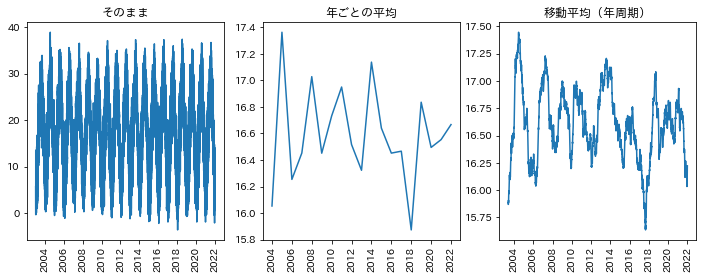

In [334]:
# 移動平均（年）
start = "2003"
end = "2021"

fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(12,4))

# そのまま
axes[0].plot(df_weather.loc[start:end,element])
axes[0].set_title("そのまま")

# 日ごとの平均
mean_by_day = df_weather[element].resample(rule="Y").mean().loc[start:end]
axes[1].plot(mean_by_day)
axes[1].set_title("年ごとの平均")

# 移動平均（年周期）
rolling_mean_day = df_weather[element].rolling(24*365,min_periods=24*364,center=True).mean().loc[start:end]
axes[2].plot(rolling_mean_day)
axes[2].set_title("移動平均（年周期）")

# x軸向き修正
for ax in axes:
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
plt.show()

# 短期的変動

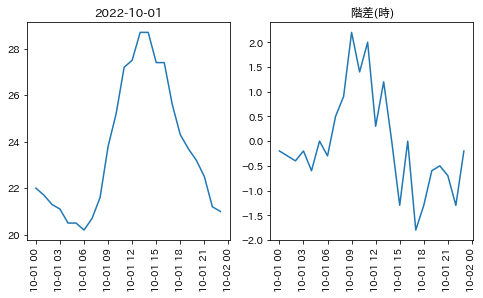

In [247]:
# 階差（時）
period = "2022-10-01"
diff = 1

fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(8,4))

axes[0].plot(df_weather.loc[period,element])
axes[0].set_title(period)
axes[1].plot(df_weather[element].diff(diff).loc[period])
axes[1].set_title("階差(時)")

for ax in axes:
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
        
plt.show()

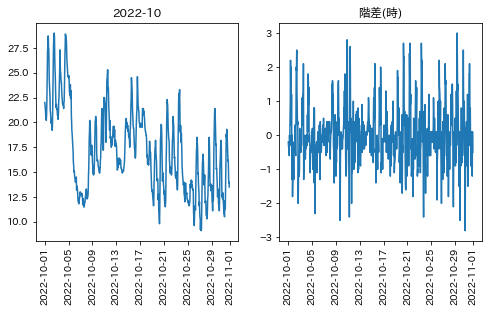

In [239]:
# 階差（時）
period = "2022-10"
diff = 1

fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(8,4))

axes[0].plot(df_weather.loc[period,element])
axes[0].set_title(period)
axes[1].plot(df_weather[element].diff(diff).loc[period])
axes[1].set_title("階差(時)")

for ax in axes:
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
        
plt.show()

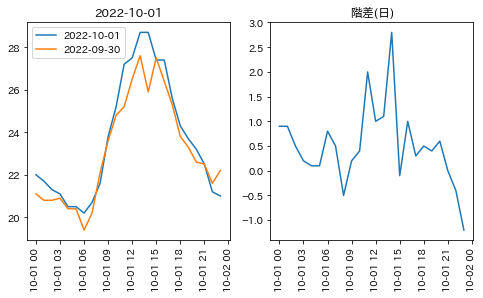

In [257]:
# 階差（日）
period = "2022-10-01"
pre_period = "2022-09-30"
diff = 24

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(8,4))

# 当日
axes[0].plot(df_weather.loc[period,element])
# 前日（軸を当日に合わる）
date = df_weather.loc[period,element].index
value = df_weather.loc[pre_period,element].reset_index()[element]
axes[0].plot(date,value)
axes[0].legend([period,pre_period])
axes[0].set_title(period)

# 階差
axes[1].plot(df_weather[element].diff(diff).loc[period])
axes[1].set_title("階差(日)")

for ax in axes:
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
        
plt.show()

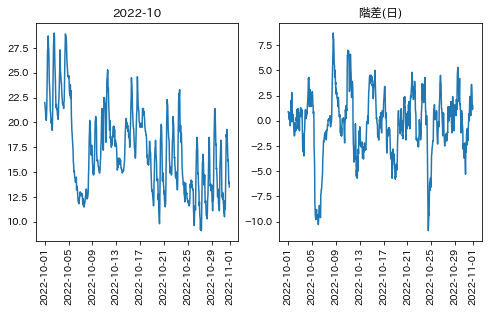

In [245]:
# 階差（日）
# 前日を描画してもいいけど見づらい
period = "2022-10"
# pre_period_s = "2022-09-30"
# pre_period_e = "2022-10-30"
diff = 24

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(8,4))

# 当日
axes[0].plot(df_weather.loc[period,element])
# # 前日（軸を当日に合わる）
# date = df_weather.loc[period,element].index
# value = df_weather.loc[pre_period_s:pre_period_e,element].reset_index()[element]
# axes[0].plot(date,value)
axes[0].set_title(period)

# 階差
axes[1].plot(df_weather[element].diff(diff).loc[period])
axes[1].set_title("階差(日)")

for ax in axes:
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
        
plt.show()

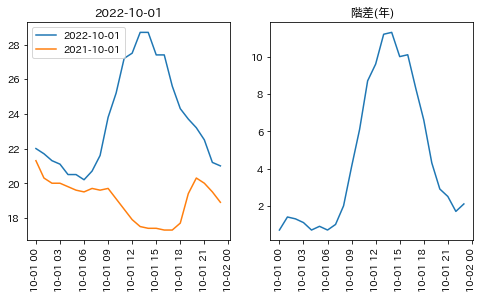

In [261]:
# 階差（年）
period = "2022-10-01"
pre_period = "2021-10-01"
diff = 24*365

fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(8,4))

axes[0].plot(df_weather.loc[period,element])
date = df_weather.loc[period,element].index
value = df_weather.loc[pre_period,element].reset_index()[element]
axes[0].plot(date,value)
axes[0].legend([period,pre_period])
axes[0].set_title(period)

axes[1].plot(df_weather[element].diff(diff).loc[period])
axes[1].set_title("階差(年)")

for ax in axes:
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
        
plt.show()

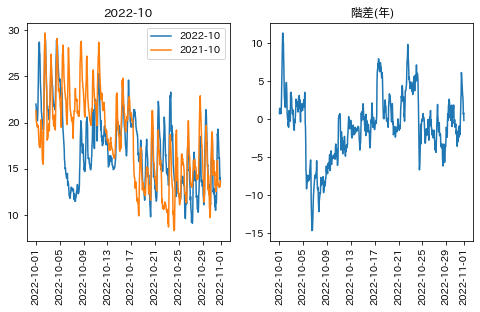

In [262]:
# 階差（年）
period = "2022-10"
pre_period = "2021-10"
diff = 24*365

fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(8,4))

axes[0].plot(df_weather.loc[period,element])
date = df_weather.loc[period,element].index
value = df_weather.loc[pre_period,element].reset_index()[element]
axes[0].plot(date,value)
axes[0].legend([period,pre_period])

axes[0].set_title(period)
axes[1].plot(df_weather[element].diff(diff).loc[period])
axes[1].set_title("階差(年)")

for ax in axes:
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
        
plt.show()

# スペクトル解析

In [372]:
# フーリエ変換
# 参考：https://nykergoto.hatenablog.jp/entry/2019/07/09/FFT_%E3%82%92%E4%BD%BF%E3%81%A3%E3%81%9F%E6%99%82%E7%B3%BB%E5%88%97%E3%83%87%E3%83%BC%E3%82%BF%E8%A7%A3%E6%9E%90

period = "2021"
n_samples = df_weather.loc[start,element].shape[0]
sampling_rate = 24

z = np.fft.fftn(df_weather.loc[period,element].values)
freq = np.fft.fftfreq(n_samples, d=1 / sampling_rate)

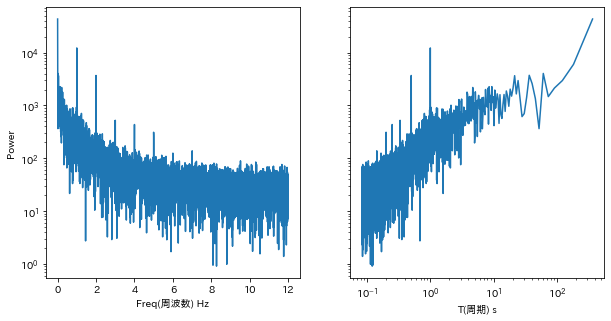

In [373]:
# 真面目に
fig, axes = plt.subplots(figsize=(10, 5), ncols=2, sharey=True)
ax = axes[0]
ax.plot(freq[1:int(n_samples / 2)], abs(z[1:int(n_samples / 2)]))
ax.set_yscale('log')
ax.set_xlabel('Freq(周波数) Hz')
ax.set_ylabel('Power')

# 周波数 f → 周期 T に直して表示する
# 周期は fT = 1 を満たすので単に逆数にすれば良い
ax = axes[1]
ax.plot(1 / freq[1:int(n_samples / 2)], abs(z[1:int(n_samples / 2)]))
ax.set_yscale('log')
ax.set_xlabel('T(周期) s')
ax.set_xscale('log')

In [374]:
# 1年周期
fft_pow_df = pd.DataFrame([1 / freq[1:int(n_samples / 2)], np.log10(abs(z[1:int(n_samples / 2)]))], index=['T', 'log10_power']).T
fft_pow_df.sort_values('log10_power', ascending=False).head(10)

,T,log10_power
0,365.000000,4.634266
364,1.000000,4.086907
1,182.500000,3.776244
5,60.833333,3.604892
9,36.500000,3.569699
729,0.500000,3.566312
16,21.470588,3.562671
14,24.333333,3.469919
2,121.666667,3.469673
8,40.555556,3.411543


In [375]:
# 階差だと？
period = "2021"
n_samples = df_weather.loc[start,element].shape[0]
sampling_rate = 1

z = np.fft.fftn(df_weather[element].diff().loc[period].values)
freq = np.fft.fftfreq(n_samples, d=1 / sampling_rate)

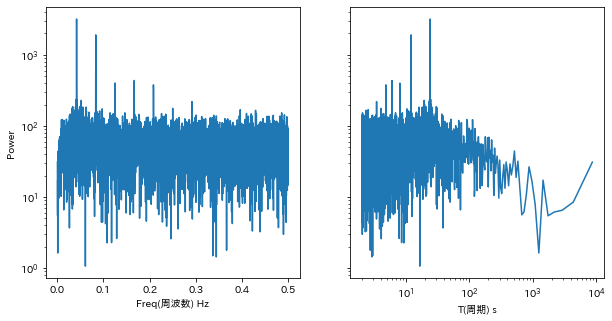

In [376]:
# 真面目に
fig, axes = plt.subplots(figsize=(10, 5), ncols=2, sharey=True)
ax = axes[0]
ax.plot(freq[1:int(n_samples / 2)], abs(z[1:int(n_samples / 2)]))
ax.set_yscale('log')
ax.set_xlabel('Freq(周波数) Hz')
ax.set_ylabel('Power')

# 周波数 f → 周期 T に直して表示する
# 周期は fT = 1 を満たすので単に逆数にすれば良い
ax = axes[1]
ax.plot(1 / freq[1:int(n_samples / 2)], abs(z[1:int(n_samples / 2)]))
ax.set_yscale('log')
ax.set_xlabel('T(周期) s')
ax.set_xscale('log')

In [377]:
fft_pow_df = pd.DataFrame([1 / freq[1:int(n_samples / 2)], np.log10(abs(z[1:int(n_samples / 2)]))], index=['T', 'log10_power']).T
fft_pow_df.sort_values('log10_power', ascending=False).head(10)

,T,log10_power
364,24.000000,3.503654
729,12.000000,3.280313
728,12.016461,2.655736
1459,6.000000,2.638774
365,23.934426,2.635559
1095,7.992701,2.602303
1093,8.007313,2.595719
730,11.983584,2.589092
1823,4.802632,2.577323
1825,4.797371,2.512993
